In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, FuncFormatter

%matplotlib widget
# 2024
# 401k limit: 23000
# roth ira limit: 7000
limit_401k = 23000
roth_ira_limit = 7000

In [2]:
ny_std_deduction = 8000
fed_std_deduction = 14600
def nys_tax(salary):
	"""new york state tax"""
	taxable_income = salary - ny_std_deduction
	if taxable_income <= 0:
		return 0
	elif taxable_income <= 8500:
		return taxable_income * 0.04
	elif taxable_income <= 11700:
		return 12000 * 0.04 + (taxable_income - 12000) * 0.045
	elif taxable_income <= 13900:
		return 12000 * 0.04 + (11700-8500) * 0.045 + (taxable_income - 11700) * 0.0525
	elif taxable_income <= 80650:
		return 12000 * 0.04 + (11700-8500) * 0.045 + (13900-11700) * 0.0525 + (taxable_income - 13900) * 0.055
	elif taxable_income <= 215400:
		return 12000 * 0.04 + (11700-8500) * 0.045 + (13900-11700) * 0.0525 + (80650-13900) * 0.055 + (taxable_income - 80650) * 0.06
	elif taxable_income <= 1077550:
		return 12000 * 0.04 + (11700-8500) * 0.045 + (13900-11700) * 0.0525 + (80650-13900) * 0.055 + (215400-80650) * 0.06 + (taxable_income - 215400) * 0.0685

	
def nyc_tax(salary):
	"""new york city tax"""
	taxable_income = salary - ny_std_deduction
	if taxable_income <= 0:
		return 0
	elif taxable_income <= 12000:
		return taxable_income * 0.03078
	elif taxable_income <= 25000:
		return 12000 * 0.03078 + (taxable_income - 12000) * 0.03762
	elif taxable_income <= 50000:
		return 12000 * 0.03078 + (25000-12000) * 0.03762 + (taxable_income - 25000) * 0.03819
	else:
		return 12000 * 0.03078 + (25000-12000) * 0.03762 + (50000-25000) * 0.03819 + (taxable_income - 50000) * 0.03876
	
def federal_tax(salary):
	taxable_inc = salary - fed_std_deduction
	if taxable_inc <= 0:
		return 0
	elif taxable_inc <= 11600:
		return taxable_inc * 0.1
	elif taxable_inc <= 47150:
		return 11600 * 0.1 + (taxable_inc - 11600) * 0.12
	elif taxable_inc <= 100525:
		return 11600 * 0.1 + (47150 - 11600) * 0.12 + (taxable_inc - 47150) * 0.22
	elif taxable_inc <= 191950:
		return 11600 * 0.1 + (47150 - 11600) * 0.12 + (100525 - 47150) * 0.22 + (taxable_inc - 100525) * 0.24
	elif taxable_inc <= 243725:
		return 11600 * 0.1 + (47150 - 11600) * 0.12 + (100525 - 47150) * 0.22 + (191950 - 100525) * 0.24 + (taxable_inc - 191950) * 0.32
	elif taxable_inc <= 609350:
		return 11600 * 0.1 + (47150 - 11600) * 0.12 + (100525 - 47150) * 0.22 + (191950 - 100525) * 0.24 + (243725 - 191950) * 0.32 + (taxable_inc - 243725) * 0.35
	else:
		return 11600 * 0.1 + (47150 - 11600) * 0.12 + (100525 - 47150) * 0.22 + (191950 - 100525) * 0.24 + (243725 - 191950) * 0.32 + (609350 - 243725) * 0.35 + (taxable_inc - 609350) * 0.37


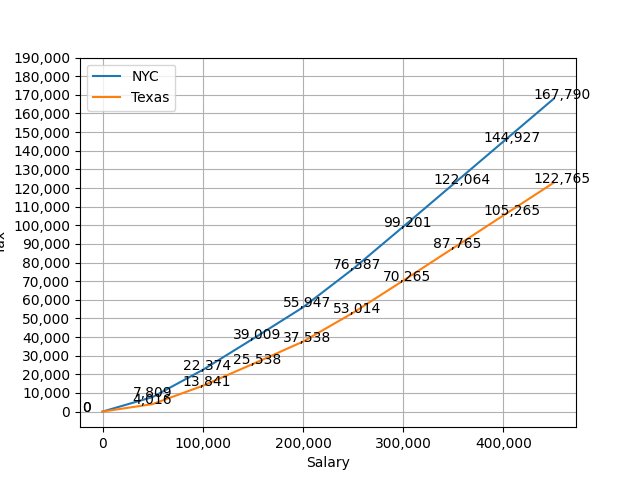

In [21]:
# nyc vs texas
plt.close()
nyc_tax_dict = { x: nyc_tax(x) + nys_tax(x) + federal_tax(x) for x in range(0, 500000, 50000)}
texas_tax = { x:  federal_tax(x) for x in range(0, 500000, 50000)}
ax = sns.lineplot(x=list(nyc_tax_dict.keys()), y=list(nyc_tax_dict.values()), label="NYC")
sns.lineplot(x=list(texas_tax.keys()), y=list(texas_tax.values()), label="Texas")	
# sns.scatterplot(x=[50000], y=[nyc_tax(50000) + nys_tax(50000) + federal_tax(50000)])
plt.grid()
def label_point(x, y, val):
	ax.text(x- 20000, y, val)
for i, sal in enumerate(nyc_tax_dict.items()):
	sal, tax = sal
	label_point(sal, tax, f'{round(tax):,}')
for i, sal in enumerate(texas_tax.items()):
	sal, tax = sal
	label_point(sal, tax, f'{round(tax):,}')
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_xlabel("Salary")
ax.set_ylabel("Tax")
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
plt.yticks(range(0, 200000, 10000))
plt.show()
plt.subplots_adjust(left=0.15)
plt.savefig("nyc_tx.png")

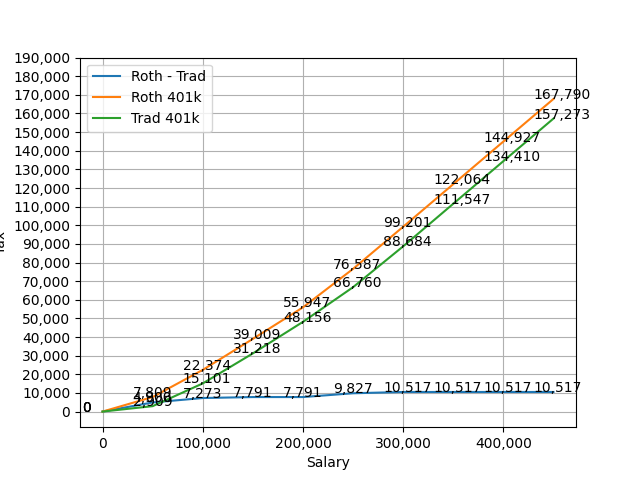

In [35]:
# roth 401 vs traditional taxes nyc
plt.close()
roth_dict = { x: nyc_tax(x) + nys_tax(x) + federal_tax(x) for x in range(0, 500000, 50000)}
trad_dict = { x:  nyc_tax(x - limit_401k) + nys_tax(x - limit_401k) + federal_tax(x - limit_401k) for x in range(0, 500000, 50000)}
diff = { x: roth_dict[x] - trad_dict[x] for x in range(0, 500000, 50000)}
sns.lineplot(x=list(diff.keys()), y=list(diff.values()), label="Roth - Trad")
ax = sns.lineplot(x=list(roth_dict.keys()), y=list(roth_dict.values()), label="Roth 401k")
sns.lineplot(x=list(trad_dict.keys()), y=list(trad_dict.values()), label="Trad 401k")	

plt.grid()
def label_point(x, y, val):
	ax.text(x- 20000, y, val)
for i, sal in enumerate(roth_dict.items()):
	sal, tax = sal
	label_point(sal, tax, f'{round(tax):,}')
for i, sal in enumerate(trad_dict.items()):
	sal, tax = sal
	label_point(sal, tax, f'{round(tax):,}')
for i, sal in enumerate(diff.items()):
	sal, tax = sal
	label_point(sal, tax, f'{round(tax)}k')
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_xlabel("Salary")
ax.set_ylabel("Tax")
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
plt.yticks(range(0, 200000, 10000))
plt.show()
plt.subplots_adjust(left=0.15)
plt.savefig("roth_trad.png")

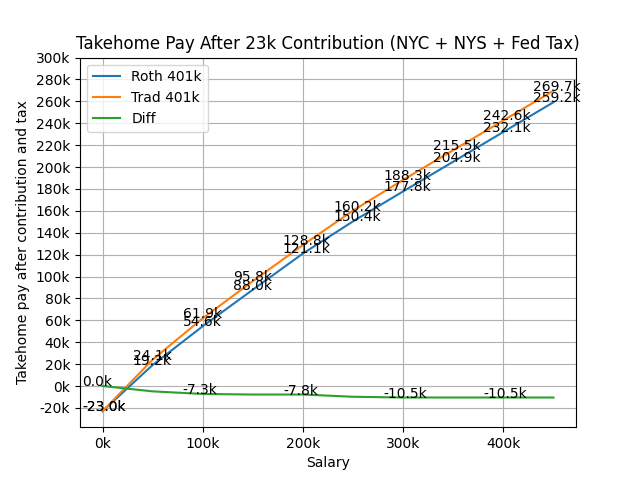

In [74]:
# roth 401 vs traditional
plt.close()
roth_dict = { x:  x - (nyc_tax(x) + nys_tax(x) + federal_tax(x)) - limit_401k for x in range(0, 500000, 50000)}

def trad_takehome(sal):
	adjusted_sal = sal - limit_401k
	tax = nyc_tax(adjusted_sal) + nys_tax(adjusted_sal) + federal_tax(adjusted_sal)
	return sal - tax - limit_401k
trad_dict = { x: trad_takehome(x) for x in range(0, 500000, 50000)}
diff = { x: roth_dict[x] - trad_dict[x] for x in range(0, 500000, 50000)}
ax = sns.lineplot(x=list(roth_dict.keys()), y=list(roth_dict.values()), label="Roth 401k")
sns.lineplot(x=list(trad_dict.keys()), y=list(trad_dict.values()), label="Trad 401k")	
sns.lineplot(x=list(diff.keys()), y=list(diff.values()), label="Diff")

plt.grid()
def label_point(x, y, val):
	ax.text(x- 20000, y, val)
for i, sal in enumerate(roth_dict.items()):
	sal, tax = sal
	label_point(sal, tax, f"{round(tax/1000,1)}k")
for i, sal in enumerate(trad_dict.items()):
	sal, tax = sal
	label_point(sal, tax, f"{round(tax/1000,1)}k")
for i, sal in enumerate(diff.items()):
	if i % 2 == 1:
		continue
	sal, tax = sal
	label_point(sal, tax, f"{round(tax/1000,1)}k")
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_xlabel("Salary")
ax.set_ylabel("Takehome pay after contribution and tax")
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: f"{round(x/1000)}k"))
ax.get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: f"{round(x/1000)}k"))
plt.yticks(range(-20000, 320000, 20000))
plt.title("Takehome Pay After 23k Contribution (NYC + NYS + Fed Tax)")
plt.show()
plt.subplots_adjust(left=0.2)
plt.savefig("nyc_roth_trad_salary.png")

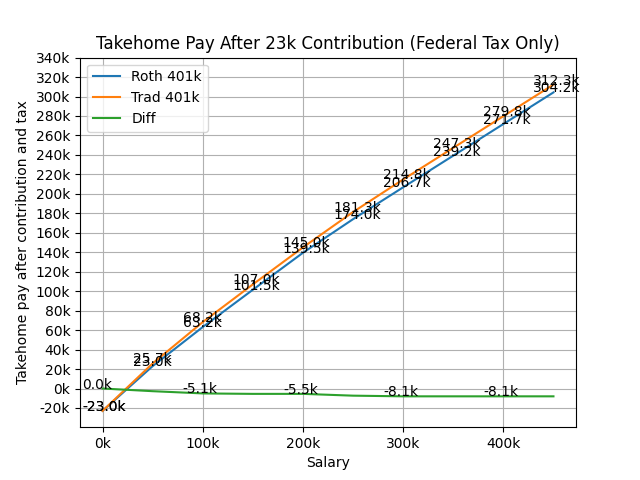

In [76]:
# roth 401 vs traditional
plt.close()
roth_dict = { x:  x - federal_tax(x)- limit_401k for x in range(0, 500000, 50000)}

def trad_takehome(sal):
	adjusted_sal = sal - limit_401k
	return sal - federal_tax(adjusted_sal) - limit_401k
trad_dict = { x: trad_takehome(x) for x in range(0, 500000, 50000)}
diff = { x: roth_dict[x] - trad_dict[x] for x in range(0, 500000, 50000)}
ax = sns.lineplot(x=list(roth_dict.keys()), y=list(roth_dict.values()), label="Roth 401k")
sns.lineplot(x=list(trad_dict.keys()), y=list(trad_dict.values()), label="Trad 401k")	
sns.lineplot(x=list(diff.keys()), y=list(diff.values()), label="Diff")

plt.grid()
def label_point(x, y, val):
	ax.text(x- 20000, y, val)
for i, sal in enumerate(roth_dict.items()):
	sal, tax = sal
	label_point(sal, tax, f"{round(tax/1000,1)}k")
for i, sal in enumerate(trad_dict.items()):
	sal, tax = sal
	label_point(sal, tax, f"{round(tax/1000,1)}k")
for i, sal in enumerate(diff.items()):
	if i % 2 == 1:
		continue
	sal, tax = sal
	label_point(sal, tax, f"{round(tax/1000,1)}k")
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_xlabel("Salary")
ax.set_ylabel("Takehome pay after contribution and tax")
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: f"{round(x/1000)}k"))
ax.get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: f"{round(x/1000)}k"))
plt.yticks(range(-20000, 350000, 20000))
plt.title("Takehome Pay After 23k Contribution (Federal Tax Only)")
plt.show()
plt.subplots_adjust(left=0.2)
plt.savefig("roth_trad_salary.png",  dpi=200)